<a href="https://colab.research.google.com/github/Nurra0210/tugas-akhir/blob/main/skripsi_clustering_bencana_alam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import pandas as pd

# Baca file CSV
file_path = '/content/nyobaaaaa.csv'  # Sesuaikan nama file sesuai dengan file yang Anda unggah
df = pd.read_csv(file_path, sep=";")

# Lihat beberapa baris pertama dari DataFrame
print(df.head())


   tahun  kecamatan         desa  tgl kejadian     jenis bencana  \
0   2019   Pakenjeng  Wangunjaya    02/01/2019  Pergerakan Tanah   
1   2019   Pamulihan       Panawa   02/01/2019    Sambaran petir   
2   2019   Pakenjeng  pasir langu   05/01/2019  Pergerakan Tanah   
3   2019   Pakenjeng  Wangunjaya    03/01/2019     Tanah Longsor   
4   2019  Pasirwangi    Sarimukti   05/01/2019   Kebakaran Rumah   

   jumlah kejadian korban jiwa ruksak berat ruksak sedang rusak rigan  
0              1.0         NaN          NaN           NaN         NaN  
1              1.0         NaN          NaN           NaN         NaN  
2              1.0         NaN          NaN           NaN         NaN  
3              1.0         NaN          NaN           NaN         NaN  
4              1.0         NaN          NaN           NaN         NaN  


In [ ]:
df.head()

,tahun,kecamatan,desa,tgl kejadian,jenis bencana,jumlah kejadian,korban jiwa,ruksak berat,ruksak sedang,rusak rigan
0,2019,Pakenjeng,Wangunjaya,02/01/2019,Pergerakan Tanah,1.0,NaN,NaN,NaN,NaN
1,2019,Pamulihan,Panawa,02/01/2019,Sambaran petir,1.0,NaN,NaN,NaN,NaN
2,2019,Pakenjeng,pasir langu,05/01/2019,Pergerakan Tanah,1.0,NaN,NaN,NaN,NaN
3,2019,Pakenjeng,Wangunjaya,03/01/2019,Tanah Longsor,1.0,NaN,NaN,NaN,NaN
4,2019,Pasirwangi,Sarimukti,05/01/2019,Kebakaran Rumah,1.0,NaN,NaN,NaN,NaN


In [ ]:
# Menampilkan ringkasan statistik
df.describe()

,tahun,jumlah kejadian
count,1326.000000,1318.000000
mean,2020.960784,1.065250
std,1.453677,0.474392
min,2019.000000,1.000000
25%,2020.000000,1.000000
50%,2021.000000,1.000000
75%,2022.000000,1.000000
max,2023.000000,10.000000


In [ ]:
# Informasi umum tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tahun            1326 non-null   int64  
 1   kecamatan        1320 non-null   object 
 2   desa             1321 non-null   object 
 3   tgl kejadian     1326 non-null   object 
 4   jenis bencana    1326 non-null   object 
 5   jumlah kejadian  1318 non-null   float64
 6   korban jiwa      573 non-null    object 
 7   ruksak berat     180 non-null    object 
 8   ruksak sedang    143 non-null    object 
 9   rusak rigan      204 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 103.7+ KB


In [ ]:
# Menampilkan nilai unik untuk setiap kolom
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:", unique_values)

Unique values for tahun: [2019 2020 2021 2022 2023]
Unique values for kecamatan : ['Pakenjeng' 'Pamulihan' 'Pasirwangi' 'Pendeuy' 'Talegong' 'Cisompet'
 'Cigedug' 'Tarogong Kidul' 'Karang tengah' 'Cikajang' 'Cisewu'
 'Sukawening' 'Cibatu' 'Bayongbong ' 'Samarang' 'Bungbulang' 'singayaja'
 'Cikelet' 'Pameungpeuk' 'Banyuresmi' 'Garut kota' 'Cisurupan' 'cilawu'
 'Bayongbong' 'Sukaresmi' 'Selaawi' 'Karangpawitan' 'cisewu' 'cibatu'
 'Leles' 'Limbangan' 'leles ' 'pasirwangi' 'Cisurupan ' 'Tarogong Kaler'
 'Kadungora' 'Pasir wangi' 'Pakenjeng ' 'Cibiuk ' 'Tarogong kidul'
 'Pamulihan ' 'Singajaya ' 'Pangatikan' 'Garut Kota' 'Karangtengah'
 'malangbong' 'Cihurip' 'Banjarwangi' 'Leuwigoong' 'Mekarmukti' 'Cilawu'
 'Wanaraja' 'Karangpawitan ' 'Singajaya' 'cilawu ' 'Kersamanah'
 'Bl. Limbangan' 'Cibiuk' 'BL.LIMBANGAN' 'PAMEUNGPEUK' 'TAROGONG KALER'
 'CILAWU' 'TAROGONG KIDUL' 'BARUSUDA' 'CIBATU' 'CISOMPET' 'BAYONGBONG'
 'KARANGTENGAH' 'KARANGPAWITAN' 'PAMULIHAN' 'LELES' 'CIBALONG'
 'GARUT KOTA' 'CIS

In [ ]:
#proses ini melakukan pengisian (filling) nilai-nilai yang hilang dalam DataFrame dengan 0.
df_filled = df.fillna(0)
print(df_filled)

      tahun     kecamatan         desa  tgl kejadian     jenis bencana  \
0      2019      Pakenjeng  Wangunjaya    02/01/2019  Pergerakan Tanah   
1      2019      Pamulihan       Panawa   02/01/2019    Sambaran petir   
2      2019      Pakenjeng  pasir langu   05/01/2019  Pergerakan Tanah   
3      2019      Pakenjeng  Wangunjaya    03/01/2019     Tanah Longsor   
4      2019     Pasirwangi    Sarimukti   05/01/2019   Kebakaran Rumah   
...     ...            ...          ...          ...               ...   
1321   2023      Sukaresmi    Padamukti   01/12/2023     Tanah Longsor   
1322   2023     Malangbong      Cikarag   01/12/2023     Tanah Longsor   
1323   2023    Banjarwangi  Tanjungjaya   01/12/2023     Tanah Longsor   
1324   2023  Karangpawitan     Jatisari   01/12/2023     Cuaca Ekstrim   
1325   2023      Cisurupan   Tambakjaya   04/12/2023     Cuaca Ekstrim   

      jumlah kejadian korban jiwa ruksak berat ruksak sedang rusak rigan  
0                 1.0           0   

In [ ]:
#proses ini melakukan penghapusan baris-baris yang memiliki nilai hilang dalam DataFrame
df_dropped_rows = df.dropna()
print(df_dropped_rows)

      tahun  kecamatan           desa  tgl kejadian         jenis bencana  \
404    2020      Cilawu      Sukaharti   03/05/2020  Angin Puting Beliung   
477    2020     Cihurip        Cihurip   05/10/2020  Angin Puting Beliung   
478    2020  Pamengpeuk     Mancagahar   12/10/2020                Banjir   
479    2020  Pamengpeuk     Sirnabakti   12/10/2020                Banjir   
480    2020  Pamengpeuk    Pameungpeuk   12/10/2020                Banjir   
481    2020  Pamengpeuk           Paas   12/10/2020                Banjir   
482    2020  Pamengpeuk   Mandalakasih   12/10/2020                Banjir   
487    2020    Peundeuy       Peundeuy   12/10/2020         Tanah Longsor   
488    2020    Peundeuy      Saribakti   12/10/2020         Tanah Longsor   
490    2020    Peundeuy     Sukanagara   12/10/2020         Tanah Longsor   
521    2020    Cibalong     Mekarmukti   12/10/2020                Banjir   
594    2021   Singajaya      Girimukti   08/02/2021         Tanah Longsor   

In [ ]:
#mencetak daftar nama kolom dari DataFrame
df_dropped_rows.columns

Index(['tahun', 'kecamatan ', 'desa ', 'tgl kejadian', 'jenis bencana',
       'jumlah kejadian', 'korban jiwa', 'ruksak berat', 'ruksak sedang',
       'rusak rigan'],
      dtype='object')

In [ ]:
#melakukan seleksi kolom dari DataFrame df_dropped_rows berdasarkan daftar kolom yang terdapat dalam variabel features.
features = ['jumlah kejadian', 'korban jiwa', 'ruksak berat', 'ruksak sedang', 'rusak rigan']
X = df_dropped_rows[features]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

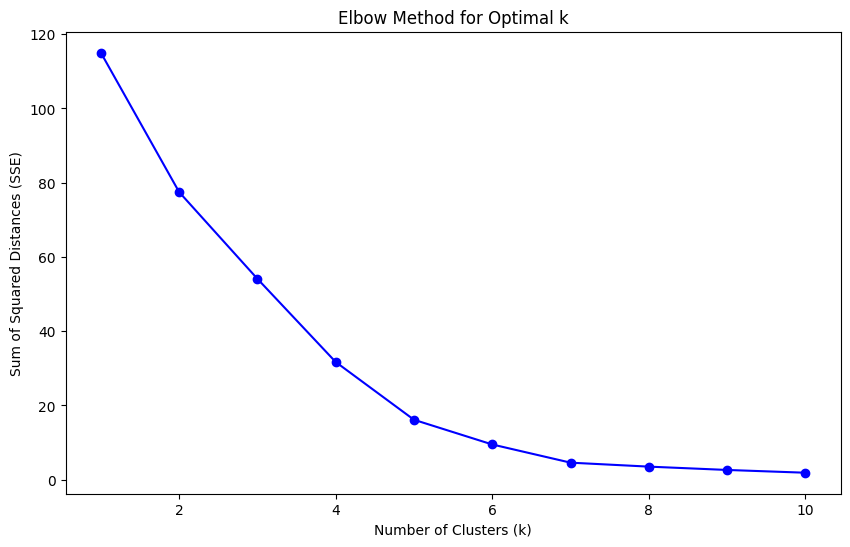

In [ ]:
#metode elbow untuk menemukan jumlah cluster optimal dalam K-Means clustering
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(k_range, sse, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# Melakukan klasterisasi dengan jumlah klaster yang optimal
kmeans = KMeans(n_clusters=4, random_state=42)
df_dropped_rows['cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-14-033962aed51b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped_rows['cluster'] = kmeans.fit_predict(X_scaled)


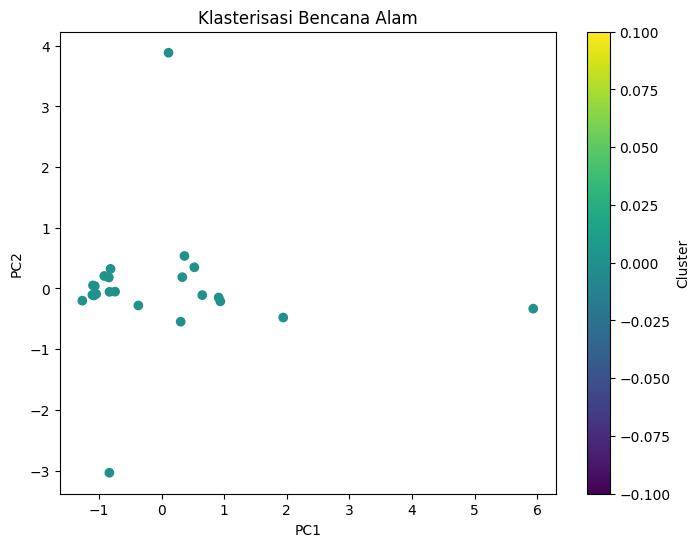

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Melakukan PCA untuk mereduksi dimensi menjadi 2 komponen utama
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Membuat DataFrame untuk komponen utama (principal components)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Menambahkan kolom cluster dari df_dropped_rows
df_pca['cluster'] = df_dropped_rows['cluster']

# Menghitung mode untuk kolom cluster
cluster_mode = df_pca['cluster'].mode()

# Jika mode ditemukan, gunakan mode, jika tidak, isi dengan nilai tertentu (misalnya 0)
if not cluster_mode.empty:
    df_pca['cluster'].fillna(cluster_mode[0], inplace=True)
else:
    # Isi dengan nilai tertentu jika mode tidak ditemukan, misalnya nilai 0
    df_pca['cluster'].fillna(0, inplace=True)

# Visualisasi hasil klasterisasi setelah mengisi NaN
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Klasterisasi Bencana Alam')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# evaluasi menggunakan DBI
dbi = davies_bouldin_score(X_scaled, kmeans.labels_)
print(f"Davies-Bouldin Index: {dbi}")

Davies-Bouldin Index: 0.22347609743713462


In [ ]:
df_dropped_rows[df_dropped_rows['cluster'] == 0]

,tahun,kecamatan,desa,tgl kejadian,jenis bencana,jumlah kejadian,korban jiwa,ruksak berat,ruksak sedang,rusak rigan,cluster
404,2020,Cilawu,Sukaharti,03/05/2020,Angin Puting Beliung,1.0,28,4,6,3,0
477,2020,Cihurip,Cihurip,05/10/2020,Angin Puting Beliung,1.0,0,0,0,0,0
478,2020,Pamengpeuk,Mancagahar,12/10/2020,Banjir,1.0,276,1,2,89,0
479,2020,Pamengpeuk,Sirnabakti,12/10/2020,Banjir,1.0,650,6,3,188,0
480,2020,Pamengpeuk,Pameungpeuk,12/10/2020,Banjir,1.0,960,3,9,305,0
481,2020,Pamengpeuk,Paas,12/10/2020,Banjir,1.0,741,5,7,172,0
487,2020,Peundeuy,Peundeuy,12/10/2020,Tanah Longsor,1.0,19,3,2,3,0
488,2020,Peundeuy,Saribakti,12/10/2020,Tanah Longsor,1.0,24,1,3,2,0
490,2020,Peundeuy,Sukanagara,12/10/2020,Tanah Longsor,1.0,23,1,2,2,0
521,2020,Cibalong,Mekarmukti,12/10/2020,Banjir,1.0,150,6,1,17,0


In [ ]:
df_dropped_rows[df_dropped_rows['cluster'] == 1]

,tahun,kecamatan,desa,tgl kejadian,jenis bencana,jumlah kejadian,korban jiwa,ruksak berat,ruksak sedang,rusak rigan,cluster
482,2020,Pamengpeuk,Mandalakasih,12/10/2020,Banjir,1.0,1632,4,45,516,1


In [ ]:
df_dropped_rows[df_dropped_rows['cluster'] == 2]

,tahun,kecamatan,desa,tgl kejadian,jenis bencana,jumlah kejadian,korban jiwa,ruksak berat,ruksak sedang,rusak rigan,cluster
970,2022,Cilawu,Ngamplangsari,15/07/2022,Banjir,2.0,402,1,5,5,2


In [ ]:
df_dropped_rows[df_dropped_rows['cluster'] == 3]

,tahun,kecamatan,desa,tgl kejadian,jenis bencana,jumlah kejadian,korban jiwa,ruksak berat,ruksak sedang,rusak rigan,cluster
975,2022,Cilawu,Mangkurakyat,15/07/2022,Banjir dan Longsor,1.0,201,51,15,1,3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


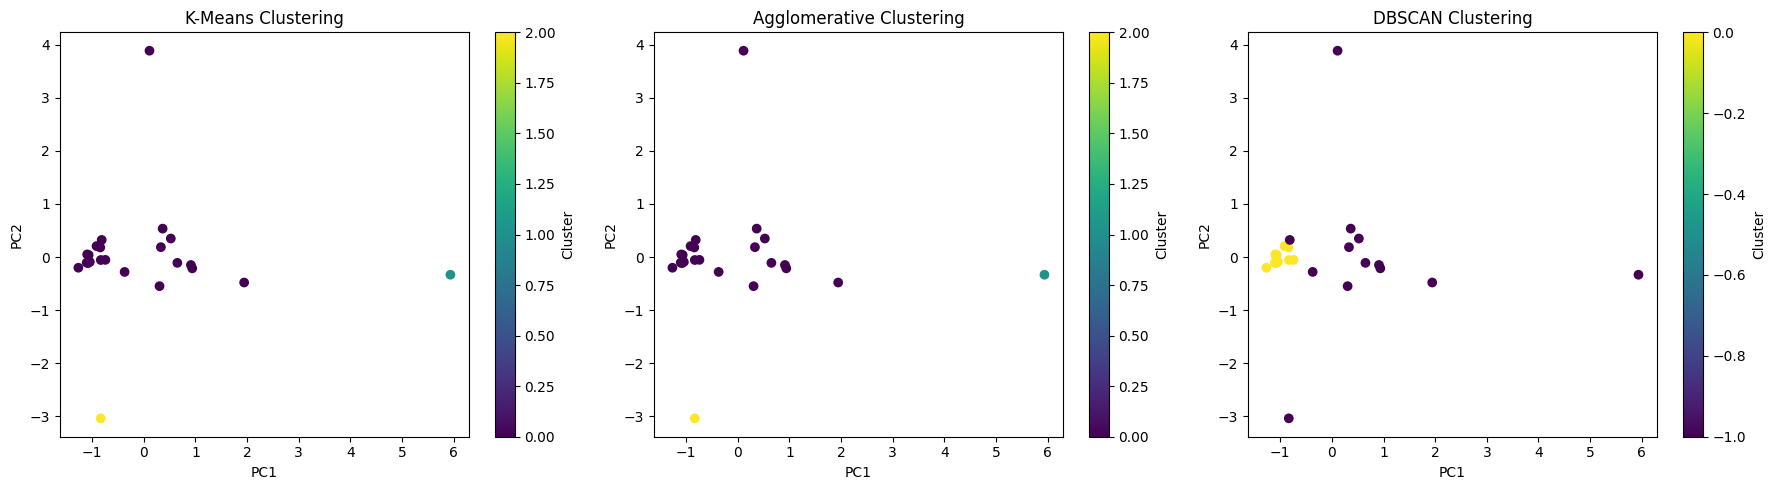

In [ ]:
# Asumsikan X_scaled sudah didefinisikan sebelumnya

# Lakukan klasterisasi dengan berbagai metode
kmeans = KMeans(n_clusters=3, random_state=42)
agglo = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit klasterisasi pada data
kmeans_labels = kmeans.fit_predict(X_scaled)
agglo_labels = agglo.fit_predict(X_scaled)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Lakukan PCA untuk mereduksi dimensi menjadi 2 komponen utama
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Membuat DataFrame untuk komponen utama dan hasil klasterisasi
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['KMeans'] = kmeans_labels
df_pca['Agglomerative'] = agglo_labels
df_pca['DBSCAN'] = dbscan_labels

# Visualisasi hasil klasterisasi dengan berbagai metode
plt.figure(figsize=(18, 5))

# Plot untuk K-Means
plt.subplot(1, 3, 1)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['KMeans'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')

# Plot untuk Agglomerative Clustering
plt.subplot(1, 3, 2)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Agglomerative'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Clustering')
plt.colorbar(label='Cluster')

# Plot untuk DBSCAN
plt.subplot(1, 3, 3)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['DBSCAN'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


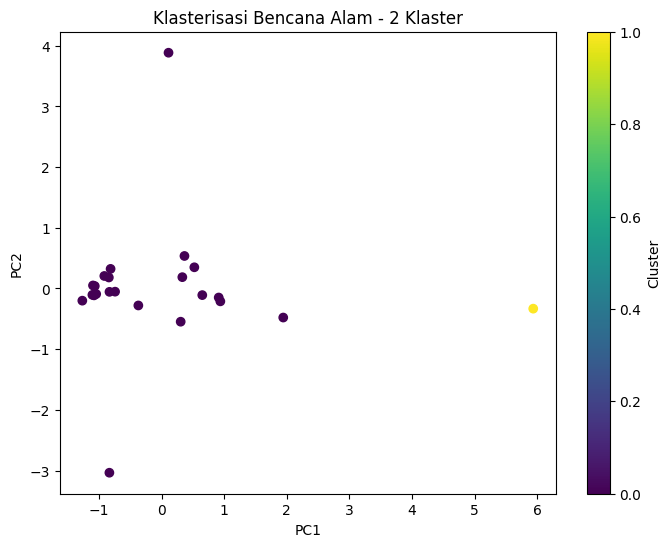

Number of clusters (k): 2, Davies-Bouldin Index: 0.242412569800375


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


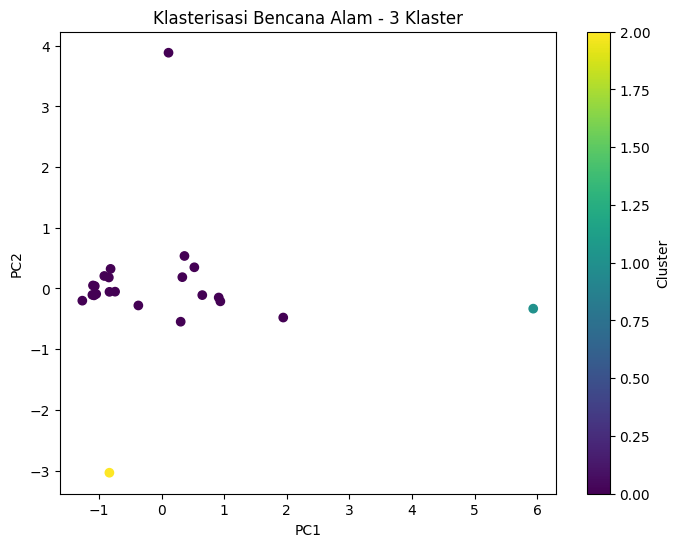

Number of clusters (k): 3, Davies-Bouldin Index: 0.25327315410119905


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


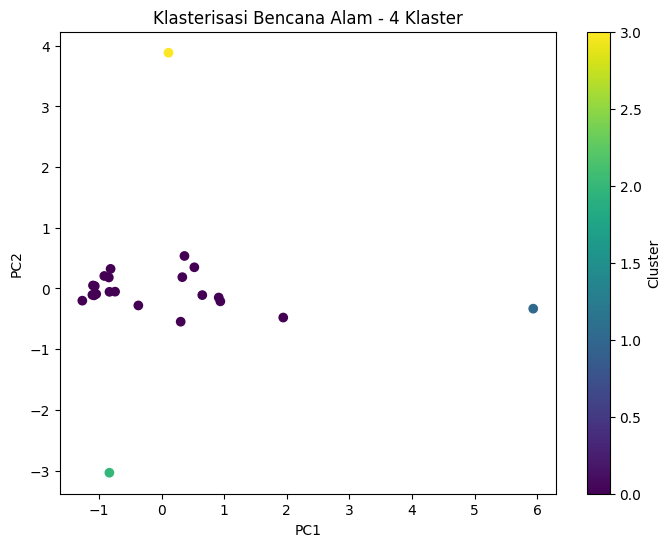

Number of clusters (k): 4, Davies-Bouldin Index: 0.22347609743713462


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


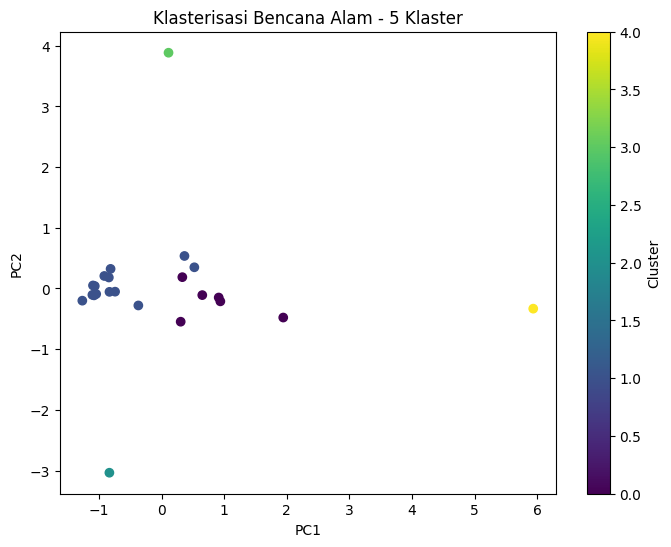

Number of clusters (k): 5, Davies-Bouldin Index: 0.49367296489941487


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


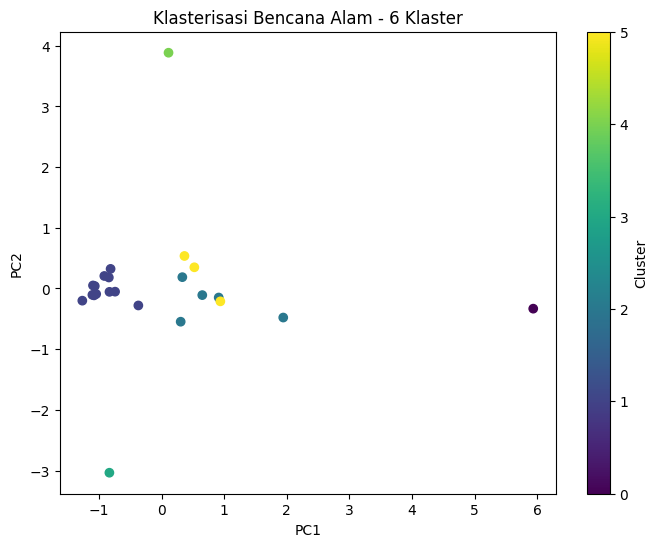

Number of clusters (k): 6, Davies-Bouldin Index: 0.49114346297505423


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


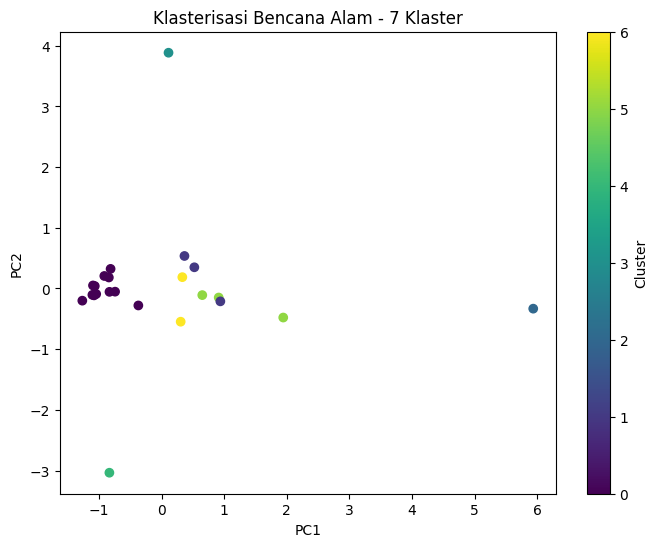

Number of clusters (k): 7, Davies-Bouldin Index: 0.3741703590596212


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


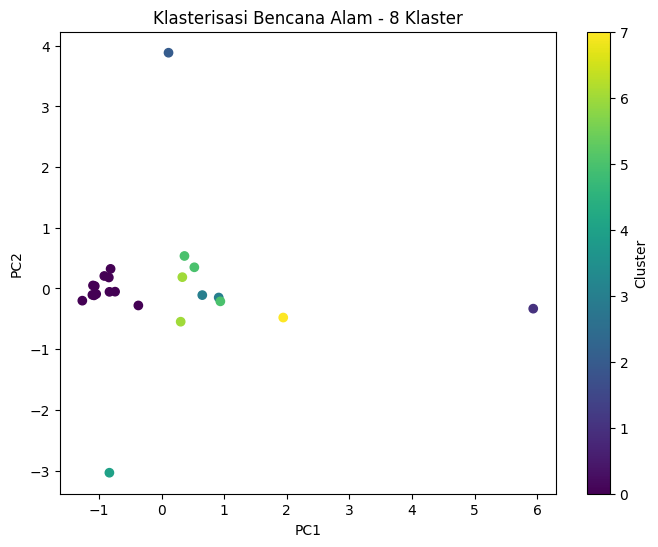

Number of clusters (k): 8, Davies-Bouldin Index: 0.3002139229460066


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


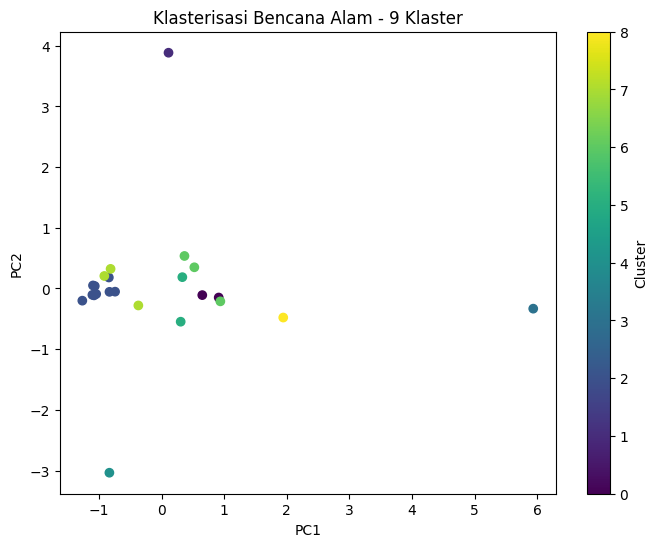

Number of clusters (k): 9, Davies-Bouldin Index: 0.45248853815248957


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


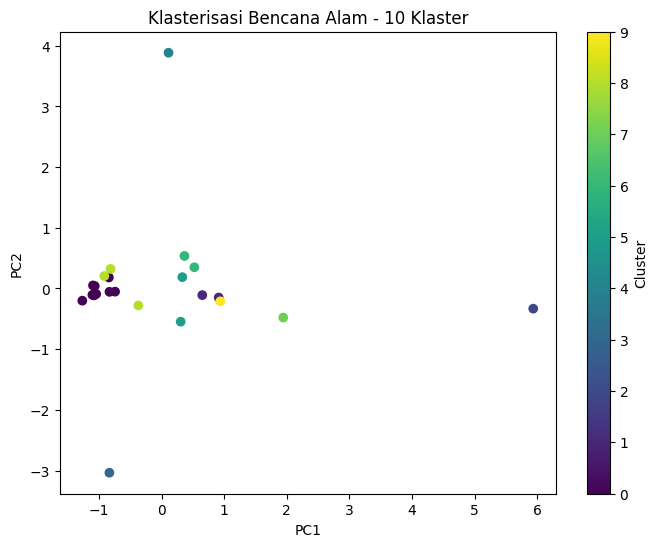

Number of clusters (k): 10, Davies-Bouldin Index: 0.40139897293770216


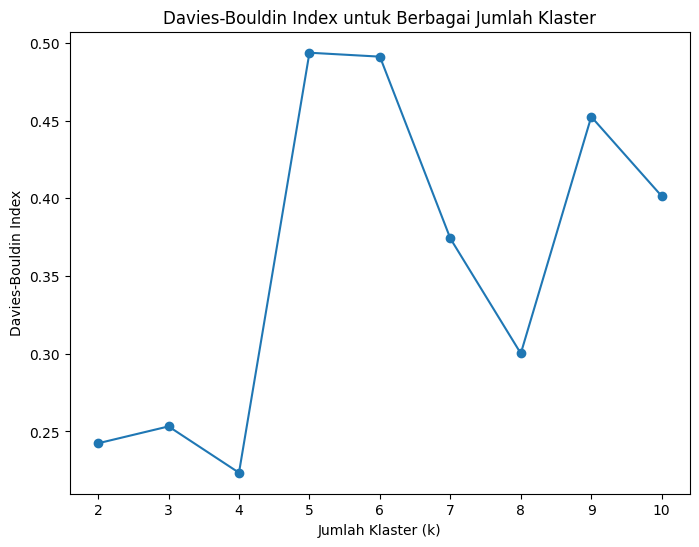

In [ ]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Misalnya, Anda memiliki data yang sudah di-scaling dalam variabel X_scaled
# X_scaled = scaler.fit_transform(data) - gunakan data yang sudah di-scaling

# Tentukan jumlah klaster yang ingin diuji
K = range(2, 11)

# List untuk menyimpan skor Davies-Bouldin Index
dbi_scores = []

# Loop untuk melakukan klasterisasi dengan berbagai jumlah klaster
for k in K:
    # Melakukan klasterisasi K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Menghitung Davies-Bouldin Index untuk klaster saat ini
    dbi = davies_bouldin_score(X_scaled, labels)
    dbi_scores.append(dbi)

    # Melakukan PCA untuk mereduksi dimensi menjadi 2 komponen utama
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X_scaled)

    # Membuat DataFrame untuk komponen utama (principal components)
    df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

    # Menambahkan kolom cluster dari hasil klasterisasi
    df_pca['cluster'] = labels

    # Visualisasi hasil klasterisasi
    plt.figure(figsize=(8, 6))
    plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'Klasterisasi Bencana Alam - {k} Klaster')
    plt.colorbar(label='Cluster')
    plt.show()

    print(f"Number of clusters (k): {k}, Davies-Bouldin Index: {dbi}")

# Menampilkan perbandingan Davies-Bouldin Index untuk semua jumlah klaster
plt.figure(figsize=(8, 6))
plt.plot(K, dbi_scores, marker='o')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index untuk Berbagai Jumlah Klaster')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Number of clusters (k): 2, Davies-Bouldin Index: 0.242412569800375
Number of clusters (k): 3, Davies-Bouldin Index: 0.25327315410119905
Number of clusters (k): 4, Davies-Bouldin Index: 0.22347609743713462
Number of clusters (k): 5, Davies-Bouldin Index: 0.49367296489941487
Number of clusters (k): 6, Davies-Bouldin Index: 0.49114346297505423
Number of clusters (k): 7, Davies-Bouldin Index: 0.3741703590596212
Number of clusters (k): 8, Davies-Bouldin Index: 0.3002139229460066


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters (k): 9, Davies-Bouldin Index: 0.45248853815248957
Number of clusters (k): 10, Davies-Bouldin Index: 0.40139897293770216

Klaster terbaik adalah dengan k = 4 dengan Davies-Bouldin Index = 0.22347609743713462


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


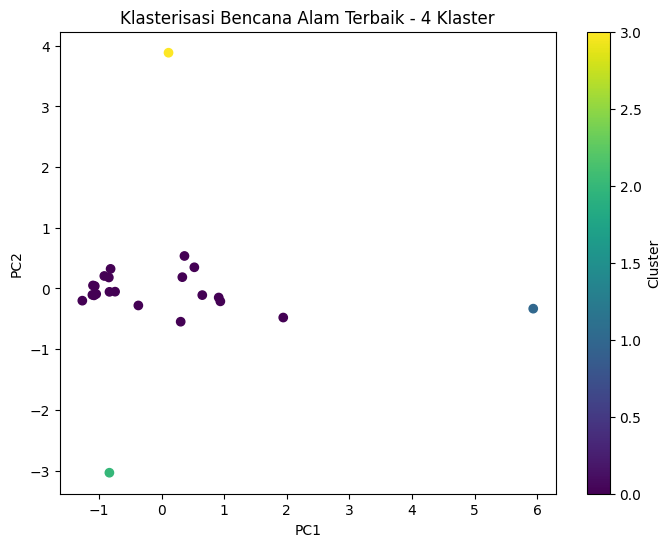

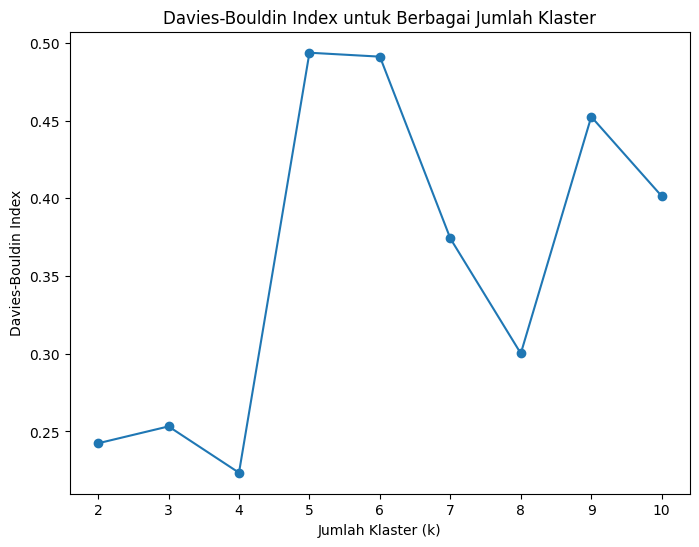

In [ ]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Misalnya, Anda memiliki data yang sudah di-scaling dalam variabel X_scaled
# X_scaled = scaler.fit_transform(data) - gunakan data yang sudah di-scaling

# Tentukan jumlah klaster yang ingin diuji
K = range(2, 11)

# List untuk menyimpan skor Davies-Bouldin Index
dbi_scores = []
kmeans_models = []

# Loop untuk melakukan klasterisasi dengan berbagai jumlah klaster
for k in K:
    # Melakukan klasterisasi K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Simpan model dan hasil klasterisasi
    kmeans_models.append((k, kmeans, labels))

    # Menghitung Davies-Bouldin Index untuk klaster saat ini
    dbi = davies_bouldin_score(X_scaled, labels)
    dbi_scores.append(dbi)

    print(f"Number of clusters (k): {k}, Davies-Bouldin Index: {dbi}")

# Menemukan klaster terbaik berdasarkan DBI (nilai terendah)
optimal_k_index = dbi_scores.index(min(dbi_scores))
optimal_k, optimal_kmeans, optimal_labels = kmeans_models[optimal_k_index]

print(f"\nKlaster terbaik adalah dengan k = {optimal_k} dengan Davies-Bouldin Index = {min(dbi_scores)}")

# Melakukan PCA untuk klaster terbaik
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Membuat DataFrame untuk komponen utama (principal components)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['cluster'] = optimal_labels

# Visualisasi hasil klasterisasi terbaik
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Klasterisasi Bencana Alam Terbaik - {optimal_k} Klaster')
plt.colorbar(label='Cluster')
plt.show()

# Menampilkan perbandingan Davies-Bouldin Index untuk semua jumlah klaster
plt.figure(figsize=(8, 6))
plt.plot(K, dbi_scores, marker='o')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index untuk Berbagai Jumlah Klaster')
plt.show()
